<a href="https://colab.research.google.com/github/Vishal64B/Computer-Vision/blob/main/2347264_CV_ETE_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Visualizing and Comparing Image Reconstruction Using DFT and Wavelet
Transform

---

> Objective: Perform image reconstruction using both the Discrete Fourier Transform (DFT) and
Wavelet Transform, and compare their performance in terms of visual quality and PSNR.

> Also,visualize the frequency components before and after zeroing out coefficients.

---
Instructions:
1. Input Image: Load given grayscale image OpenCV.
2. DFT Analysis and Reconstruction: (4 marks)

    o Apply the Discrete Fourier Transform (DFT) to the image.

    o Visualize the DFT frequency spectrum.

    o Reconstruct the image using the inverse DFT with the remaining coefficients.

    o Visualize the reconstructed image after applying DFT and compare it with the
    original image.
---

3. Wavelet Transform Analysis and Reconstruction: (6 marks)

    o Apply the Wavelet Transform (using a suitable wavelet, e.g., Haar or Daubechies)
    to the image.

    o Visualize the Wavelet decomposition in level 1 & level 2
    o Reconstruct the image using the inverse Wavelet Transform with the remaining
    coefficients.

    o Visualize the reconstructed image after applying Wavelet and compare it with the
    original image.

---

4. Comparison: (4 marks)

    o PSNR Calculation: Calculate the PSNR between the original image and the
    reconstructed images for both DFT and Wavelet approaches.

    o Compare the PSNR values for DFT and Wavelet.

    o Discuss the visual differences between the DFT-reconstructed image and the
    Wavelet-reconstructed image.

---
5. Visualization of DFT & wavelet (expected visualization of wavelet ) ( 6 marks)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

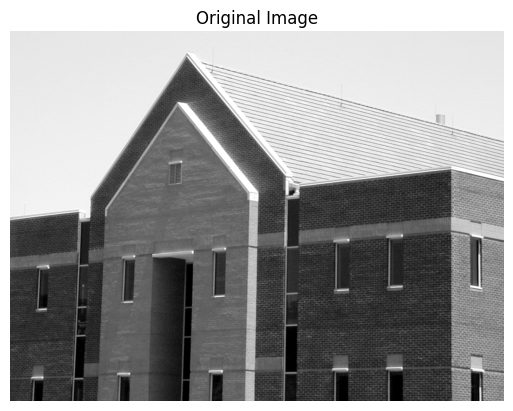

In [2]:
# Step1: Reading the image
image = cv2.imread("image.tif",0)   ## passing 0 to read it as grayscale image

## Plotting the image
plt.imshow(image,cmap = 'gray')
plt.axis("off")
plt.title('Original Image')
plt.show()

In [3]:
print(image.shape)
## Dimensions are - (834,1114)

(834, 1114)


In [4]:
def calculate_psnr(original_image, reconstructed_image):
    mse = np.mean((original_image - reconstructed_image) ** 2)
    if mse == 0:  # Means no noise
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

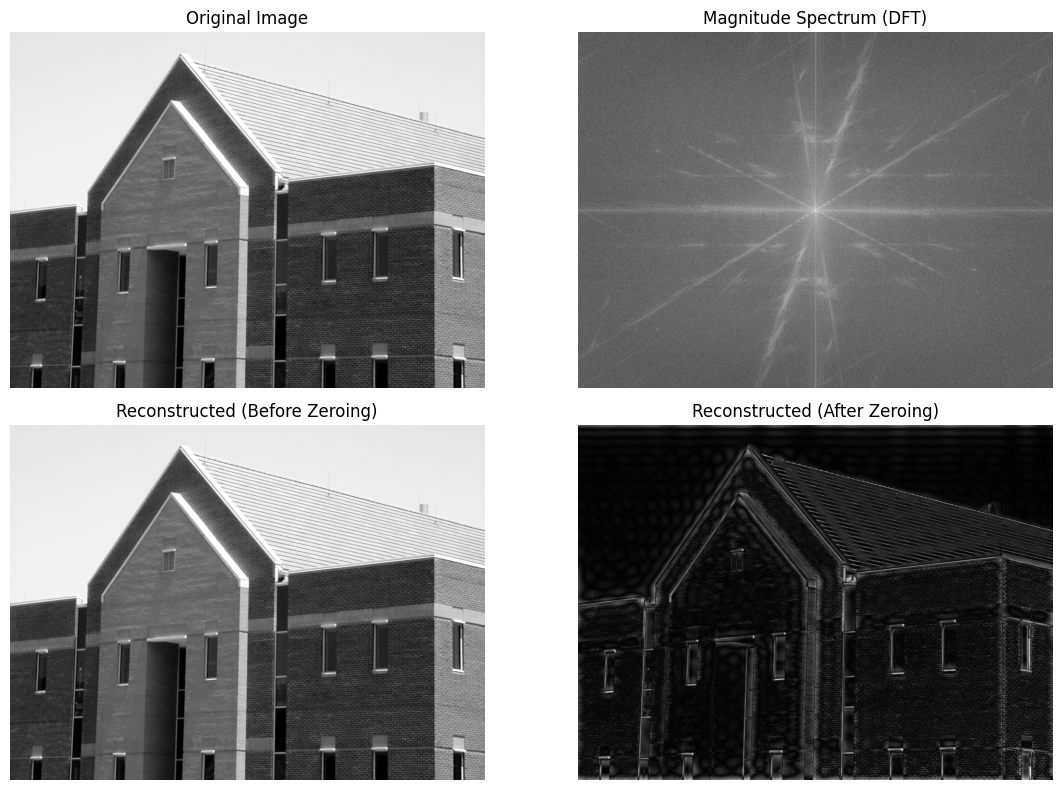



-----------------------------------------------------------


PSNR for DFT-reconstructed image before zeroing out coefficients: 308.45 dB
PSNR for DFT-reconstructed image after zeroing out high frequency coefficients: 4.95 dB

## Inferences:
1. DFT effectively decomposes an image into frequency components, with low frequencies representing structure and high frequencies capturing fine details.
2. Zeroing out high-frequency components results in a blurred image, retaining the general structure but losing sharpness.
3. The PSNR value of 4.95 dB indicates that the quality of the DFT-reconstructed after zeroing out high frequency components image is significantly lower than the original image, highlighting the degradation in image quality when higher frequency components are removed.



In [5]:
# Step 2: Apply the Discrete Fourier Transform (DFT) to the image.
          # Visualize the DFT frequency spectrum.

          # Reconstruct the image using the inverse DFT with the remaining coefficients.

          # Visualize the reconstructed image after applying DFT and compare it with the original image.


# Step 2: Applying DFT
f = np.fft.fft2(image)

# Shifting zero-frequency DC components to the center
fshift = np.fft.fftshift(f)


# Step 3: Visualizing the DFT frequency spectrum
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Step 4: Reconstructing the image before zeroing out coefficients using inverse DFT
f_ishift = np.fft.ifftshift(fshift)
reconstructed_image_before = np.abs(np.fft.ifft2(f_ishift))

# Step 5: Zeroing out high-frequency components
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Creating a mask to keep low-frequency components
mask = np.ones((rows, cols), np.uint8)
r = 20
# Zeroing out the high-frequency components
mask[crow - r:crow + r, ccol - r:ccol + r] = 0

## Applying mask
fshift_masked = fshift * mask

# Step 6: Reconstructing the image after zeroing out coefficients
f_ishift_masked = np.fft.ifftshift(fshift_masked)  # Inverse shift
reconstructed_image_after = np.abs(np.fft.ifft2(f_ishift_masked))  # Inverse DFT

# Step 7: Plotting all the images side by side for comparison
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# DFT Magnitude Spectrum
plt.subplot(222)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (DFT)')
plt.axis('off')

# Reconstructed Image Before Zeroing Out Coefficients
plt.subplot(223)
plt.imshow(reconstructed_image_before, cmap='gray')
plt.title('Reconstructed (Before Zeroing)')
plt.axis('off')

# Reconstructed Image After Zeroing Out Coefficients
plt.subplot(224)
plt.imshow(reconstructed_image_after, cmap='gray')
plt.title('Reconstructed (After Zeroing)')
plt.axis('off')

plt.tight_layout()
plt.show()


print("\n\n-----------------------------------------------------------\n\n")


# Calculateing PSNR for DFT-reconstructed image
psnr_before_dft = calculate_psnr(image, reconstructed_image_before)
psnr_after_dft = calculate_psnr(image, reconstructed_image_after)

print(f'PSNR for DFT-reconstructed image before zeroing out coefficients: {psnr_before_dft:.2f} dB')
print(f'PSNR for DFT-reconstructed image after zeroing out high frequency coefficients: {psnr_after_dft:.2f} dB')

print('''
## Inferences:
1. DFT effectively decomposes an image into frequency components, with low frequencies representing structure and high frequencies capturing fine details.
2. Zeroing out high-frequency components results in a blurred image, retaining the general structure but losing sharpness.
3. The PSNR value of 4.95 dB indicates that the quality of the DFT-reconstructed after zeroing out high frequency components image is significantly lower than the original image, highlighting the degradation in image quality when higher frequency components are removed.
''')



In [6]:
pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.8 MB/s eta 0:00:00


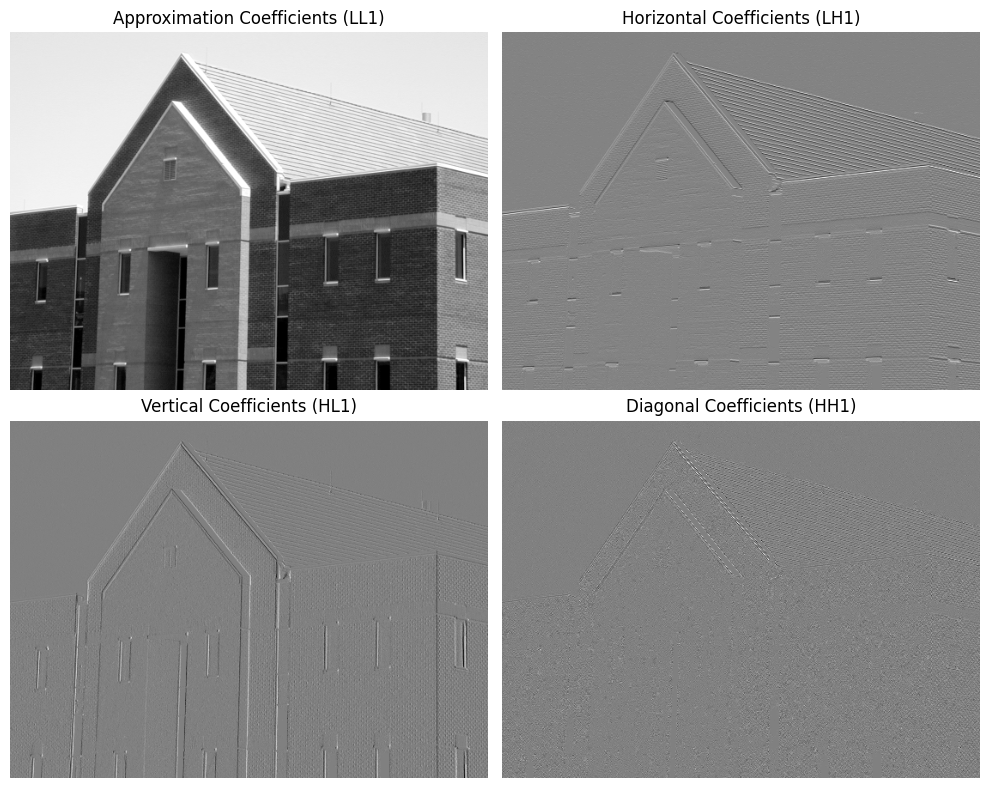

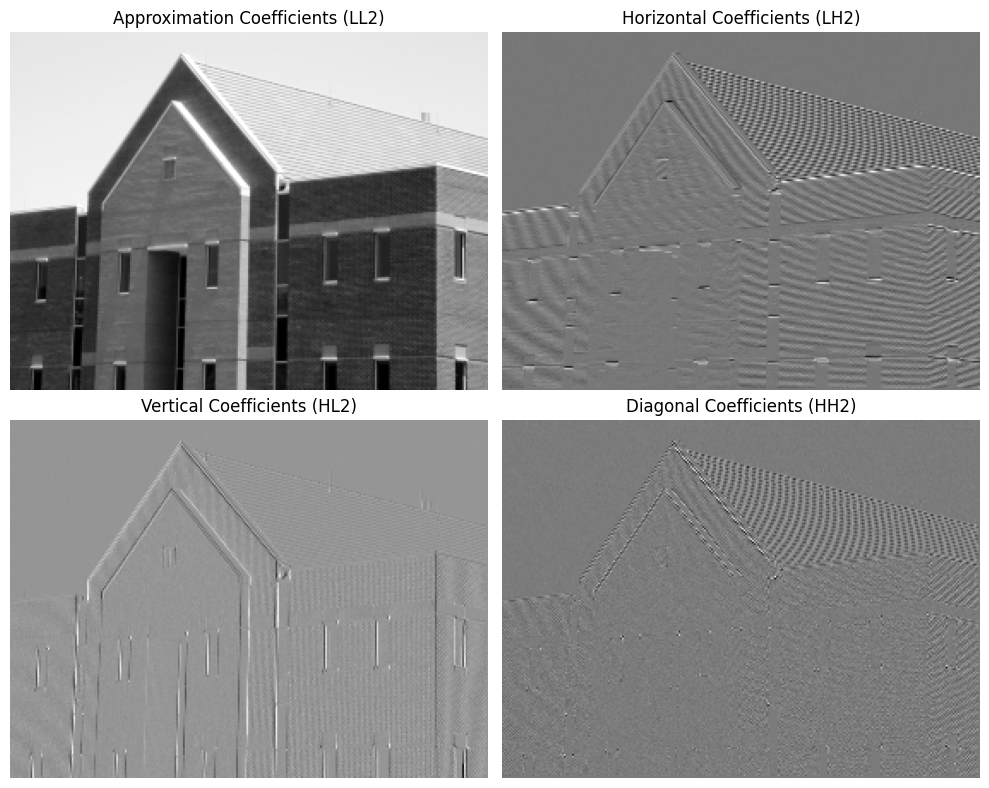

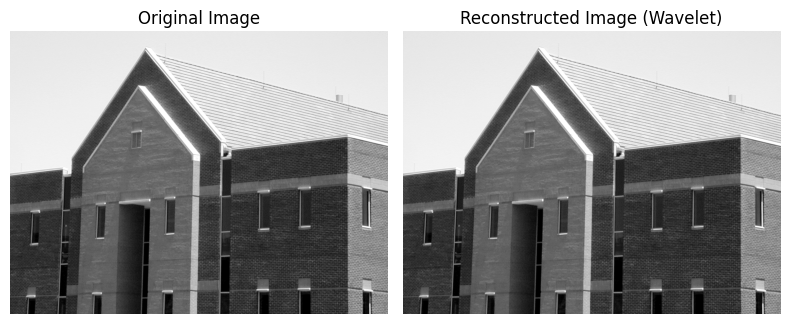

-----------------------


Mean Squared Error between original and reconstructed image: 0.000000


In [7]:
## Task 3: Wavelet Transform Analysis and Reconstruction: (6 marks)
s = '''
        o Apply the Wavelet Transform (using a suitable wavelet, e.g., Haar or Daubechies)
        to the image.
        o Visualize the Wavelet decomposition in level 1 & level 2
        o Reconstruct the image using the inverse Wavelet Transform with the remaining
        coefficients.
        o Visualize the reconstructed image after applying Wavelet and compare it with the
        original image.
'''
import pywt


# Step 1: Reading the image
image = cv2.imread('image.tif', 0)

# Step 2: Applying Haar Wavelet Transform (Level 1 decomposition)
coeffs_1 = pywt.wavedec2(image, 'haar', level=1)
LL1, [LH1, HL1, HH1] = coeffs_1

# Visualizing Wavelet Decomposition at Level 1
plt.figure(figsize=(10, 8))

plt.subplot(221)
plt.imshow(LL1, cmap='gray')
plt.title('Approximation Coefficients (LL1)')
plt.axis('off')

plt.subplot(222)
plt.imshow(LH1, cmap='gray')
plt.title('Horizontal Coefficients (LH1)')
plt.axis('off')

plt.subplot(223)
plt.imshow(HL1, cmap='gray')
plt.title('Vertical Coefficients (HL1)')
plt.axis('off')

plt.subplot(224)
plt.imshow(HH1, cmap='gray')
plt.title('Diagonal Coefficients (HH1)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 3: Applying the Wavelet Transform (Level 2 decomposition)
coeffs_2 = pywt.wavedec2(image, 'haar', level=2)
LL2, [LH2, HL2, HH2], [LH1, HL1, HH1] = coeffs_2

# Visualize Wavelet Decomposition at Level 2
plt.figure(figsize=(10, 8))

plt.subplot(221)
plt.imshow(LL2, cmap='gray')
plt.title('Approximation Coefficients (LL2)')
plt.axis('off')

plt.subplot(222)
plt.imshow(LH2, cmap='gray')
plt.title('Horizontal Coefficients (LH2)')
plt.axis('off')

plt.subplot(223)
plt.imshow(HL2, cmap='gray')
plt.title('Vertical Coefficients (HL2)')
plt.axis('off')

plt.subplot(224)
plt.imshow(HH2, cmap='gray')
plt.title('Diagonal Coefficients (HH2)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 4: Reconstructing the image using the inverse wavelet transform using waverec2

reconstructed_image_wavelet = pywt.waverec2(coeffs_2, 'haar')

# Step 5: Visualize the reconstructed image and compare with the original
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(reconstructed_image_wavelet, cmap='gray')
plt.title('Reconstructed Image (Wavelet)')
plt.axis('off')

plt.tight_layout()
plt.show()

# MSE
print("-----------------------\n\n")
mse = np.mean((image - reconstructed_image_wavelet) ** 2)
print(f'Mean Squared Error between original and reconstructed image: {mse:.6f}')


In [8]:
## Task 4: Comparison: (4 marks)
s = """o PSNR Calculation: Calculate the PSNR between the original image and the
reconstructed images for both DFT and Wavelet approaches.
o Compare the PSNR values for DFT and Wavelet.
o Discuss the visual differences between the DFT-reconstructed image and the
Wavelet-reconstructed image."""

# Step 1: Calculating the PSNR for Wavelet-reconstructed image
psnr_wavelet = calculate_psnr(image, reconstructed_image_wavelet)

# Step 2: Compare the PSNR values for DFT and Wavelet
print(f'PSNR for DFT-reconstructed image before: {psnr_before_dft:.2f} dB')
print(f'PSNR for DFT-reconstructed image after: {psnr_after_dft:.2f} dB')
print(f'PSNR for Wavelet-reconstructed image: {psnr_wavelet:.2f} dB')

# Step 3: Discuss visual differences
print('''
## Visual Comparison:
1. The DFT-reconstructed image (after zeroing out high frequencies) tends to be more blurred due to the removal of fine details.
2. Wavelet transform retains more information by keeping both low and high-frequency coefficients, whereas the DFT approach may lose crucial details when high-frequency components are zeroed out.
3. Overall, the Wavelet transform often provides better visual quality compared to the DFT, especially in terms of preserving image features and textures.
''')




PSNR for DFT-reconstructed image before: 308.45 dB
PSNR for DFT-reconstructed image after: 4.95 dB
PSNR for Wavelet-reconstructed image: 309.00 dB

## Visual Comparison:
1. The DFT-reconstructed image (after zeroing out high frequencies) tends to be more blurred due to the removal of fine details.
2. Wavelet transform retains more information by keeping both low and high-frequency coefficients, whereas the DFT approach may lose crucial details when high-frequency components are zeroed out.
3. Overall, the Wavelet transform often provides better visual quality compared to the DFT, especially in terms of preserving image features and textures.



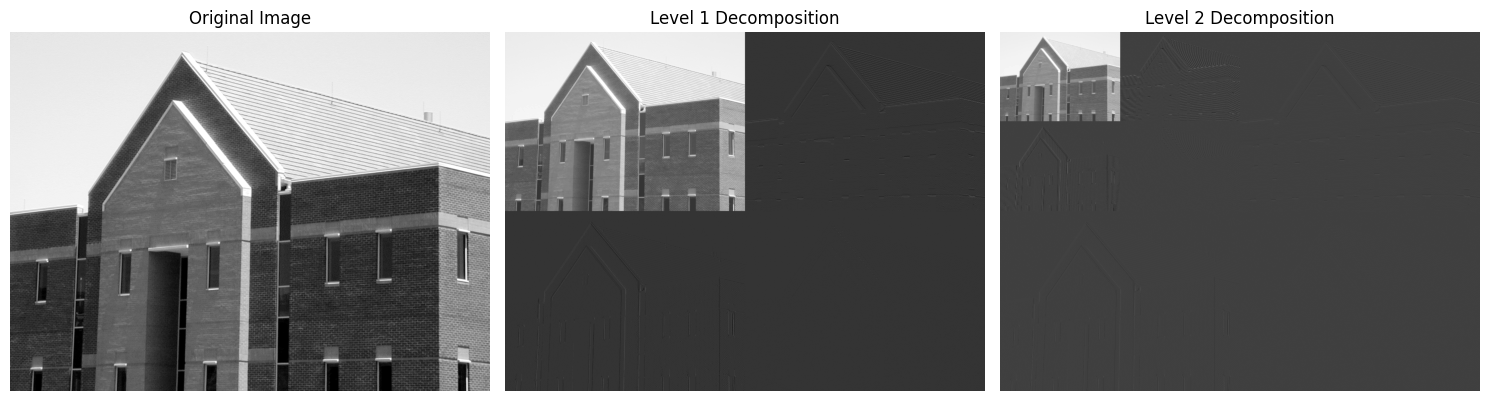

In [9]:
img = cv2.imread("image.tif", 0)

# Step 2: Performing wavelet decomposition using Haar wavelet
wavelet = 'haar'

# Level 1 decomposition
coeffs_1 = pywt.dwt2(img, wavelet)
LL1, (LH1, HL1, HH1) = coeffs_1

# Level 2 decomposition
coeffs_2 = pywt.dwt2(LL1, wavelet)
LL2, (LH2, HL2, HH2) = coeffs_2

# Step 3: Visualization function
def plot_wavelet_coefficients(coeffs_1, coeffs_2, original_image, figsize=(15, 5)):
    # Extracting coefficients
    LL1, (LH1, HL1, HH1) = coeffs_1
    LL2, (LH2, HL2, HH2) = coeffs_2

    # Create figure with subplots
    fig, axs = plt.subplots(1, 3, figsize=figsize)

    # Plotting original image
    axs[0].imshow(original_image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    # Level 1 composition
    h, w = LL1.shape
    level1_viz = np.zeros((h * 2, w * 2))
    level1_viz[:h, :w] = LL1
    level1_viz[:h, w:] = LH1
    level1_viz[h:, :w] = HL1
    level1_viz[h:, w:] = HH1

    # Level 2 composition
    h2, w2 = LL2.shape
    level2_viz = np.zeros((h * 2, w * 2))
    level2_viz[:h2, :w2] = LL2
    level2_viz[:h2, w2:2*w2] = LH2
    level2_viz[h2:2*h2, :w2] = HL2
    level2_viz[h2:2*h2, w2:2*w2] = HH2
    level2_viz[:h, w:] = LH1
    level2_viz[h:, :w] = HL1
    level2_viz[h:, w:] = HH1

    # Plot the two levels
    axs[1].imshow(level1_viz, cmap='gray')
    axs[1].set_title('Level 1 Decomposition')
    axs[1].axis('off')

    axs[2].imshow(level2_viz, cmap='gray')
    axs[2].set_title('Level 2 Decomposition')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()



plot_wavelet_coefficients(coeffs_1, coeffs_2, img)